In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [25]:
rewards_dqn_v1 = np.loadtxt('../outputs/dqn-v1.txt')
rewards_dqn_v2 = np.loadtxt('../outputs/dqn-v2.txt')[:20000]
rewards_td_v1 = np.loadtxt('../outputs/td-v1.txt')
rewards_td_v2 = np.loadtxt('../outputs/td-v2.txt')
rewards_td_v3 = np.loadtxt('../outputs/td-v3.txt')
rewards_td_v4 = np.loadtxt('../outputs/td-v4.txt')
rewards_random = np.loadtxt('../outputs/random.txt')

In [26]:
def running_average(window_size, data):
    average_data = []
    for ind in range(len(data) - window_size + 1):
        average_data.append(np.mean(data[ind:ind+window_size]))
    for ind in range(window_size - 1):
        average_data.insert(0, np.nan)
    return average_data

In [27]:
def plot_running_averages():
    plt.plot(running_average(500,rewards_dqn_v1), label='DQN-V1')
    plt.plot(running_average(500,rewards_dqn_v2), label='DQN-V2')
    plt.plot(running_average(500,rewards_td_v1), label='TD-V1')
    plt.plot(running_average(500,rewards_td_v2), label='TD-V2')
    plt.plot(running_average(500,rewards_td_v3), label='TD-V3')
    plt.plot(running_average(500,rewards_td_v4), label='TD-V4')
    plt.plot(running_average(500,rewards_random), label='Random agent')
    plt.legend()
    plt.title('Moving Average of cumulative rewards per episode')
    plt.xlabel('Number of episodes')
    plt.ylabel('Cumulative reward')

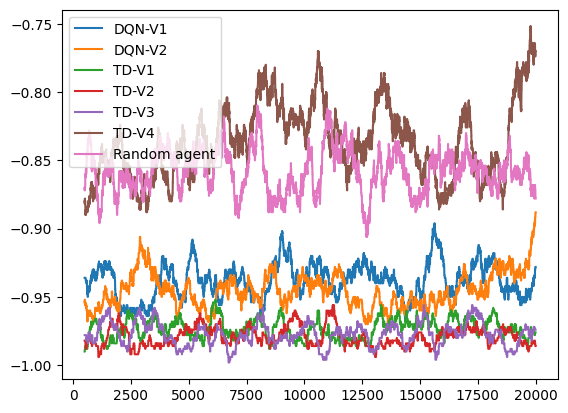

In [28]:
plot_running_averages()